In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
import seaborn as sns
sns.set()

In [25]:
def data_preprocessing(df):
    
    df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'LF':'Low_Fat','Low Fat':'Low_Fat','reg':'Regular',
                                                             'Regular':'Regular','low fat':'Low_Fat'})
    
    df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
    
    df['Outlet_Years'] = 2013-df['Outlet_Establishment_Year']
    
    df.drop('Outlet_Establishment_Year',axis = 1,inplace = True)
    
    
    outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
    miss_bool_outlet = df['Outlet_Size'].isnull() 

    df.loc[miss_bool_outlet,'Outlet_Size'] = df.loc[miss_bool_outlet,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
    
    
    df['Item_Visibility'] = df['Item_Visibility'].replace(0,df.Item_Visibility.mean())
    
    visibility_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')
    miss_bool_visibility = (df['Item_Visibility'] == 0)

    #df.loc[miss_bool_visibility,'Item_Visibility'] = df.loc[miss_bool_visibility,'Item_Identifier'].apply(lambda x: visibility_avg[x])
    
    
    df['Item_Types_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
    
    df['Item_Types_Combined'] = df['Item_Types_Combined'].map({'FD':'Food',
                                                          'DR':'Drinks',
                                                          'NC':'Non-Consumable'})
    
    df.loc[df['Item_Types_Combined'] == "Non-Consumable",'Item_Fat_Content'] = "Non_Edible"
    
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()

    var_mod = ['Item_Types_Combined','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Identifier','Item_Fat_Content']

    for i in var_mod:
        df[i] = le.fit_transform(df[i])
        
    data = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Types_Combined','Outlet_Identifier'],drop_first = True)
    
    targets = data['Item_Outlet_Sales']
    inputs = data.drop(['Item_Outlet_Sales','Item_Type','Item_Identifier','Item_Visibility'],axis = 1)
    
    return targets,inputs

In [26]:
data = pd.read_csv('Train_UWu5bXk.csv')

In [27]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
y,X = data_preprocessing(data)

In [29]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
r_sq = reg.score(X,y)
r_sq

0.5634405044892987

In [31]:
y_pred = reg.predict(X)

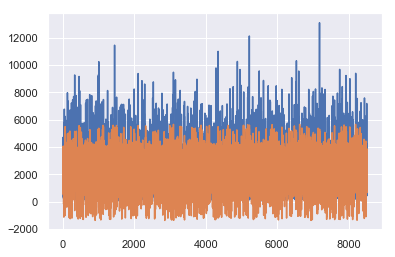

In [33]:
plt.plot(range(len(y)),y)
plt.plot(range(len(y)),y_pred)


In [38]:
table = pd.DataFrame()
table['Coefficients'] = reg.coef_
table['Variables'] = X.columns

In [42]:
table

,Coefficients,Variables
0,-0.547428,Item_Weight
1,15.556962,Item_MRP
2,17.560978,Outlet_Years
3,-4.988852,Item_Fat_Content_1
4,41.031774,Item_Fat_Content_2
5,653.816794,Outlet_Location_Type_1
6,-298.358009,Outlet_Location_Type_2
7,616.559235,Outlet_Size_1
8,-726.783485,Outlet_Size_2
9,919.185972,Outlet_Type_1
